<div style="text-align: center">
<img src="https://www.frenchscienceindia.org/wp-content/uploads/2017/02/Logo-Univ-Paris-Saclay.png" width="150px">
</div>

<div style="text-align: center">

# [Paris Saclay Center for Data Science](http://www.datascience-paris-saclay.fr)

# Predict used cars prices!


_des lauriers Cédric, Cornille Théo_

# Introduction

When shopping for a used vehicle, typically an overriding concern is: Am I paying too much? This question is often difficult to answer due to the fact that it's hard to keep track of all the vehicles of interest currently available on the market.

A second, and related concern, is: Which vehicles with similar specifications are available? This information can help the buyer get a feel for what else is available on the market and provide an indication of the value of the vehicle currently under consideration.

<img src="https://static.carfromjapan.com/wp-content/uploads/2016/08/tips_for_buying_a_used_car.png" width="500px">

In this project, we would like to build a tool that helps both used car buyers and user car sellers. Indeed, it could help used car buyers to know which price they are going to pay depending on the characteristic they entered for a specific type of car. But, it will also help used car sellers to adjust their price.
Thus, the goal of this project is to develop prediction models able to predict the prices of used cars depending on their characteristics.
The solutions to this challenge must give the buyers some knowledge about what's make the price of a car.

## Metric used

In order to get accurate prices for new used cars, the mean squared error will be our metric for this challenge.

<img src="https://qph.fs.quoracdn.net/main-qimg-008e40d98b5ce869d6b19c8eb9108178" width="300px">

## The Data

The dataset we will manipulate comes from Ebay data. Ebay is an American multinational e-commerce corporation based in San Jose California, founded in 1995 that facilitates consumer-to-consumer and business-to-consumer sales through its website. Over 370000 used cars have been scraped with Scrapy.

As the content was in german, the data has been translated in english to be easily understandable. 

As inputs we have:
* name : "name" of the car
* seller : private or dealer
* offerType
* price : the price on the ad to sell the car
* abtest
* vehicleType
* yearOfRegistration : at which year the car was first registered
* gearbox
* powerPS : power of the car in PS
* model
* kilometer : how many kilometers the car has driven
* monthOfRegistration : at which month the car was first registered
* fuelType
* brand
* notRepairedDamage : if the car has a damage which is not repaired yet
* postalCode
* dateCreated : the date for which the ad at ebay was created
* dateCrawled : when this ad was first crawled, all field-values are taken from this date
* lastSeenOnline : when the crawler saw this ad last online

### Required dependencies and downloads

* `numpy`
* `pandas`
* `scikit-learn`
* `matplolib`
* `seaborn`
* `imbalanced-learn`

You need to install our runing requirements to be able to use our notebook on your PC. Simply run the command below

In [ ]:
# !pip install -r requirements.txt

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
import os

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#  I ) Exploratory data analysis

### Loading the data

In [105]:
train_filename = 'data/car_data.csv'
data = pd.read_csv(train_filename, encoding = "latin-1")
#data['PurchDate'] = pd.to_datetime(data['PurchDate'])
print(data.shape)
data.head()

(371528, 19)


,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,dateCreated,dateCrawled,lastSeen
0,Golf_3_1.6,private,offer,480,test,NaN,1993,manual,0,golf,150000,0,gasoline,volkswagen,NaN,70435,2016-03-24 00:00:00,2016-03-24 11:52:17,2016-04-07 03:16:57
1,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manual,190,NaN,125000,5,diesel,audi,yes,66954,2016-03-24 00:00:00,2016-03-24 10:58:45,2016-04-07 01:46:50
2,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,163,grand,125000,8,diesel,jeep,NaN,90480,2016-03-14 00:00:00,2016-03-14 12:52:21,2016-04-05 12:47:46
3,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small,2001,manual,75,golf,150000,6,gasoline,volkswagen,no,91074,2016-03-17 00:00:00,2016-03-17 16:54:04,2016-03-17 17:40:17
4,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small,2008,manual,69,fabia,90000,7,diesel,skoda,no,60437,2016-03-31 00:00:00,2016-03-31 17:25:20,2016-04-06 10:17:21


In [106]:
data.dtypes

name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
postalCode              int64
dateCreated            object
dateCrawled            object
lastSeen               object
dtype: object

The training data frame has 72000+ instances.

In [107]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,99998.00000


In [108]:
# We count the missing data for each variable
missing_values = data.isnull().sum()
missing_values

name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
postalCode                 0
dateCreated                0
dateCrawled                0
lastSeen                   0
dtype: int64

In [111]:
cat_val = ["seller", "offerType", "abtest", "gearbox","fuelType", "notRepairedDamage", "vehicleType"]
for col in cat_val:
    print ([col],":",data[col].unique())

['seller'] : ['private' 'dealer']
['offerType'] : ['offer' 'request']
['abtest'] : ['test' 'control']
['gearbox'] : ['manual' 'automatic' nan]
['fuelType'] : ['gasoline' 'diesel' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']
['notRepairedDamage'] : [nan 'yes' 'no']
['vehicleType'] : [nan 'coupe' 'suv' 'small' 'limousine' 'convertible' 'bus' 'estate'
 'other']


In [ ]:
from problem import get_train_data()

data_train, y_train = get_train_data()

In [ ]:
from problem import get_test_data()

data_test, y_test = get_test_data()

In [117]:
from problem import clean_and_transform

X_train = clean_and_transform(data_train)
X_test = clean_data(data_test)

In [118]:
X_train.head()

,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,dateCreated,dateCrawled,lastSeen
0,79207,1,0,480,1,0,1993,2,0,119,150000,0,4,38,0,70435,99,164563,178839
1,4112,1,0,18300,1,3,2011,2,190,52,125000,5,2,1,2,66954,99,164294,178355
2,90564,1,0,9800,1,8,2004,0,163,120,125000,8,2,14,0,90480,89,76564,162956
3,76592,1,0,1500,1,7,2001,2,75,119,150000,6,4,38,1,91074,92,106204,45272
4,170493,1,0,3600,1,7,2008,2,69,104,90000,7,2,31,1,60437,106,231164,171913


# A AMELIORER TOUT CE QU'IL Y A EN DESSOUS

In [80]:
# Filter bad data
cars_c = data.copy()
cars_c = cars_c[
    (cars_c["yearOfRegistration"].between(1945, 2017, inclusive=True)) &
    (cars_c["powerPS"].between(100, 500, inclusive=True)) &
    (cars_c["price"].between(100, 200000, inclusive=True))
]

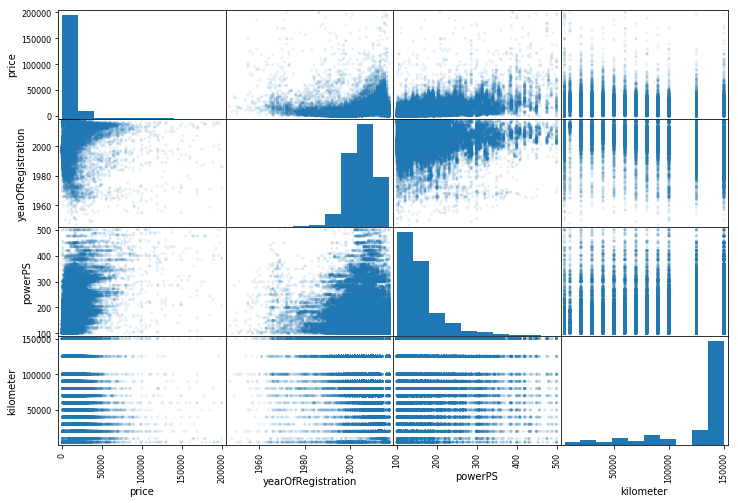

In [81]:
num_attributes = ["price", "yearOfRegistration", "powerPS", "kilometer"]
%matplotlib inline
pd.plotting.scatter_matrix(cars_c[num_attributes], figsize = (12,8), alpha = 0.1)
plt.show()

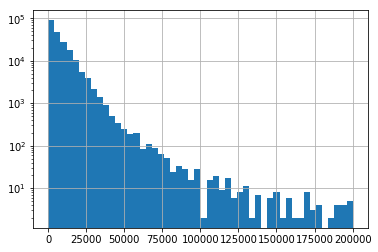

In [82]:
cars_c["price"].hist(bins = 50, log = True)

In [83]:
# Discarded amount of the Data

print("Current Data Amount : ", cars_c.shape[0], "\n","Current Data Amount %: ", cars_c.shape[0]/data.shape[0])

Current Data Amount :  209316 
 Current Data Amount %:  0.5633922611485541


# The available variables

In [42]:
# We count the missing data for each variable
print(data.isnull().sum())

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64


In [51]:
cars_clean.head()

,name,seller,offerType,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
1,2136,1,0,18300,4,2011,2,190,50,125000,5,4,1,1,66954
2,56312,1,0,9800,8,2004,0,163,115,125000,8,4,14,0,90480
5,20652,1,0,650,7,1995,2,102,11,150000,10,1,2,1,33775
6,87933,1,0,2200,3,2004,2,109,8,150000,8,1,25,2,67112
8,44386,1,0,14500,2,2014,2,125,59,30000,8,1,10,0,94505


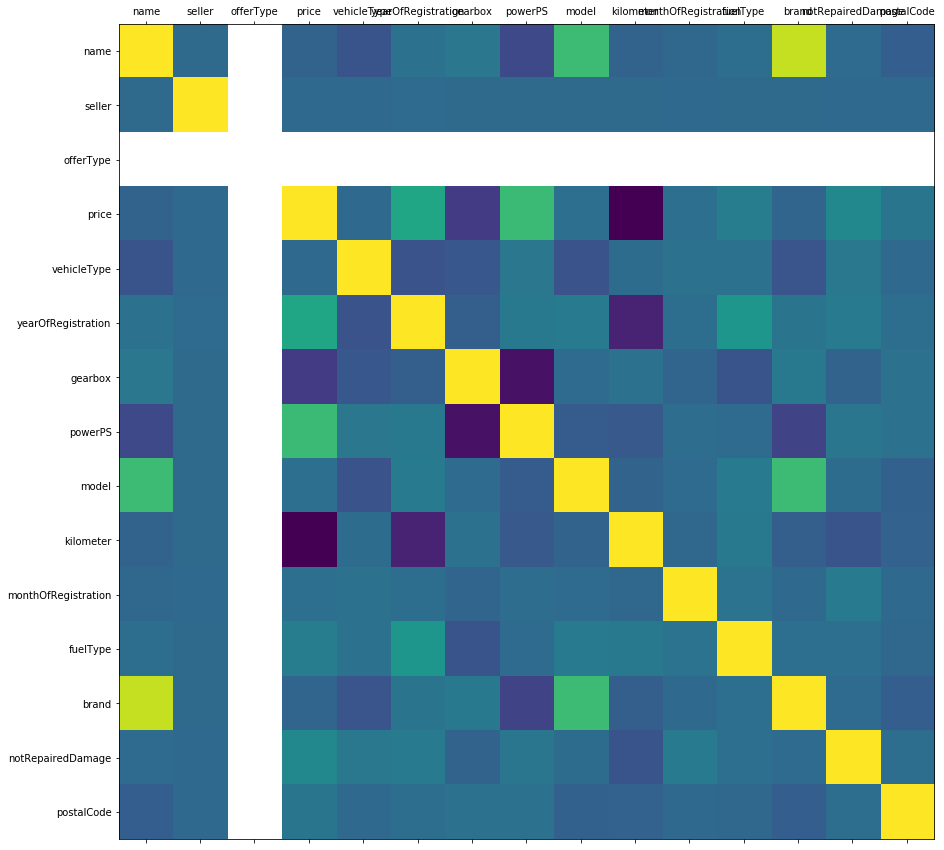

In [48]:
# matrice de correlation 
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(cars_clean,size=15)

In [53]:
cars_clean = cars_clean.drop(['offerType'], axis=1)

We will not consider the variables **Unnamed**, **RefId** and **BYRNO** as they are not useful in the classification task. We will not use **AucGuart** and **PrimeUnit** either as most of the values of these variables are missing are missing.

The variable we are trying to predict is **IsbadBuy**. This binary variable indicates if the considered car is a "lemon", i.e. if it is a bad quality used car, which is more expensive than it should be regarding several characteristics of the car. In that case, it outputs 1. Otherwise, its value is 0.

We can predict if the car is a "lemon" not only using the **characteristics of the car**, but also some **external variables** related to the car. We list below the variables belonging to these two groups:

### Characteristics of the car:
- **Make:**	Vehicle Manufacturer 
- **Model:** Vehicle Model
- **Trim:**	Vehicle Trim Level
- **SubModel:**	Vehicle Submodel
- **Color:**	Vehicle Color
- **Transmission:**	Vehicles transmission type (Automatic, Manual)
- **WheelTypeID:**	The type id of the vehicle wheel
- **WheelType:** The vehicle wheel type description (Alloy, Covers)
- **VehOdo:**	The vehicles odometer reading
- **Nationality:**	The Manufacturer's country
- **Size:**	The size category of the vehicle (Compact, SUV, etc.)
- **TopThreeAmericanName:** Identifies if the manufacturer is one of the top three American manufacturers

### Other variables (price, auction details, ...):
- **PurchDate:** The Date the vehicle was Purchased at Auction
- **Auction:**	Auction provider at which the  vehicle was purchased
- **VehYear:**	The manufacturer's year of the vehicle
- **VehicleAge:** The Years elapsed since the manufacturer's year
- **MMR Prices:** 8 variables. 8 MMR prices (found in the Manheim inventory: https://publish.manheim.com/en/services/valuation) based on over 10 million sales transactions for the previous 13 months of the car. Examples of variables: MMRAcquisitionAuctionAveragePrice, MMRAcquisitionAuctionCleanPrice, MMRAcquisitionRetailAveragePrice.
- **VNZIP:** Zipcode where the car was purchased
- **VNST:** State where the the car was purchased
- **VehBCost:** Acquisition cost paid for the vehicle at time of purchase
- **WarrantyCost:** Warranty price (term=36month  and millage=36K) 
- **IsOnlineSale:** Identifies if the vehicle was originally purchased online

Some of the variables that are very highly correlated can be dropped. For example: **VehYear** and **Vehicle age**.

As expected, the MMR prices (retail and auction) are highly correlated. We also examine these prices' correlation with the actual acquisition cost, and the distribution of the prices.

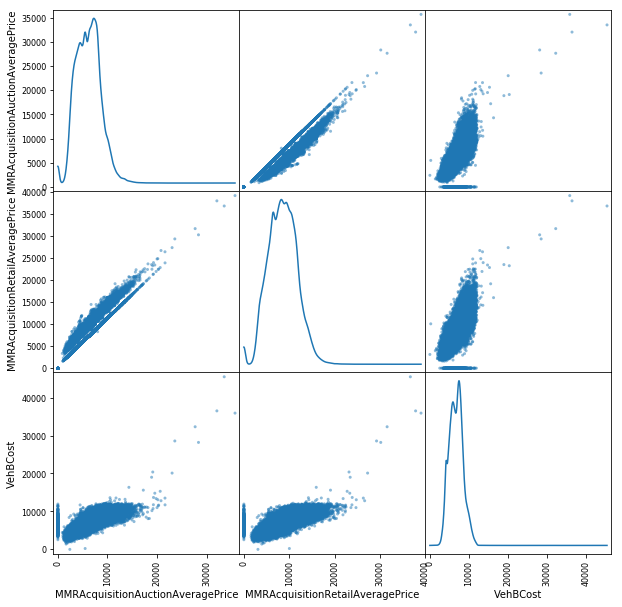

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(data.get(['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionRetailAveragePrice',
                         'VehBCost']), figsize=(10, 10), diagonal='kde');

# II )  Pipeline task and prediction

In [55]:
cars_clean.head()

,name,seller,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode
1,2136,1,18300,4,2011,2,190,50,125000,5,4,1,1,66954
2,56312,1,9800,8,2004,0,163,115,125000,8,4,14,0,90480
5,20652,1,650,7,1995,2,102,11,150000,10,1,2,1,33775
6,87933,1,2200,3,2004,2,109,8,150000,8,1,25,2,67112
8,44386,1,14500,2,2014,2,125,59,30000,8,1,10,0,94505


In [12]:
# ligne du dessous overwrite les fichiers 
#%%file problem.py
import os
import pandas as pd
import rampwf as rw
from sklearn.model_selection import StratifiedShuffleSplit

problem_title = 'Cars price'
_target_column_names = 'price'
_ignore_column_names = ["postalCode", "name" ] #["name", "seller", "offerType", "vehicleType", "fuelType", "brand", "notRepairedDamage"]
#_prediction_label_names = [0, 1]

Predictions = rw.prediction_types.make_regression(
    label_names=_target_column_names)
# An object implementing the workflow
workflow = rw.workflows.FeatureExtractorRegressor()




# New Error
# To penalize more if one did not predict a 'risk zone'


score_types = [
    rw.score_types.RMSE(name='rmse'),
    #rw.score_types.Accuracy(name='acc'),
    #rw.score_types.NegativeLogLikelihood(name='nll'),
]


def get_cv(X, y):
    bins     = np.linspace(0, max(y), 1000)
    y_binned = np.digitize(y, bins)
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y_binned)
    cv = StratifiedShuffleSplit(n_splits=8, test_size=0.2, random_state=57)
    
    return cv.split(X, y_binned)


def _read_data(path, f_name):
    data = pd.read_csv(os.path.join(path, 'data', f_name))
    y_array = data[_target_column_names].values
    X_df = data.drop([_target_column_names] + _ignore_column_names, axis=1)
    return X_df, y_array


def get_train_data(path='.'):
    f_name = 'train.csv'
    return _read_data(path, f_name)


def get_test_data(path='.'):
    f_name = 'test.csv'
    return _read_data(path, f_name)

In [13]:
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import FeatureUnion
from sklearn.tree import DecisionTreeRegressor
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error

import numpy as np


In [15]:
train_X, train_y = get_train_data()
test_X, test_y = get_test_data()


In [24]:
train_X.head()

,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,dateCrawled,lastSeen
0,private,offer,test,NaN,2005,NaN,0,147,125000,0,gasoline,alfa_romeo,NaN,2014-03-10 00:00:00,2016-03-16 11:48:06,2016-04-07 04:46:24
1,private,offer,test,bus,1995,automatic,200,andere,150000,0,gasoline,chevrolet,no,2015-03-20 00:00:00,2016-03-23 14:42:46,2016-04-07 03:45:01
2,private,offer,test,limousine,2014,automatic,0,c_klasse,20000,2,diesel,mercedes_benz,NaN,2015-06-11 00:00:00,2016-03-23 01:48:59,2016-04-06 09:47:02
3,private,offer,test,bus,1993,NaN,0,ducato,30000,1,diesel,fiat,NaN,2015-06-18 00:00:00,2016-03-05 21:44:26,2016-04-05 17:46:09
4,private,offer,control,convertible,2005,manual,163,slk,150000,6,gasoline,mercedes_benz,no,2015-08-07 00:00:00,2016-04-02 19:47:40,2016-04-07 09:15:23


### Feature extractor

We've used the same feature extractor for all of our models. We fill the Na values of MMR with their median, and we transform categorical variables to dummy ones using OneHotEncoder method

In [22]:
#%%file submissions/starting_kit/feature_exctractor.py
# pour écrire par dessus 

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


def add_missing_dummy_columns(d, columns):
    missing_cols = set(columns) - set(d.columns)
    for c in missing_cols:
        d[c] = 0


def fix_columns(d, columns):
    add_missing_dummy_columns(d, columns)

    # make sure we have all the columns we need
    assert (set(columns) - set(d.columns) == set())

    d = d[columns]
    return d


class FeatureExtractor():
    def __init__(self):
        pass
    
    #def __init__(self,attribute_names):
       # self.attribute_names = attribute_names
        
                
        
    def fit(self, X_df, y=None):
        global column_dummies
        if y is not None:
            column_dummies = pd.concat(
            [X_df.get(['yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration']),
             pd.get_dummies(X_df.seller, prefix = 'Size', drop_first=True),
             #pd.get_dummies(X_df.offerType, prefix='Auction', drop_first=True),
             pd.get_dummies(X_df.vehicleType, prefix='Color', drop_first=True),
             pd.get_dummies(X_df.fuelType, prefix='Transmission', drop_first=True),
             pd.get_dummies(X_df.brand, prefix='Nationality', drop_first=True),
             pd.get_dummies(X_df.notRepairedDamage, prefix='notRepairedDamage', drop_first=True),
             
             ],
            axis=1).columns
        return self
        return self
    
    
    def transform(self, X_df):
        #print(column_dummies)
        X_df_new = pd.concat(
            [X_df.get(['yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration']),
             pd.get_dummies(X_df.seller, prefix = 'seller', drop_first=True),
             #pd.get_dummies(X_df.offerType, prefix='Auction', drop_first=True),
             pd.get_dummies(X_df.vehicleType, prefix='vehicleType', drop_first=True),
             pd.get_dummies(X_df.fuelType, prefix='fuelType', drop_first=True),
             pd.get_dummies(X_df.brand, prefix='brand', drop_first=True),
             pd.get_dummies(X_df.notRepairedDamage, prefix='notRepairedDamage', drop_first=True),
             
             ],
            axis=1)
        #X_df_new = X_df_new.fillna(-1)
        
        X_df_new = fix_columns(X_df_new, column_dummies)
        
        scaler = StandardScaler()

        #X_df_new[['yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration']] = scaler.fit_transform(X_df_new [['yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration']])
        
        X_df_new= X_df_new.as_matrix()
        return X_df_new

## Regressor 

In [20]:
#%%file submissions/starting_kit/regressor.py
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


class Regressor(BaseEstimator):
    def __init__(self):
        self.reg = DecisionTreeRegressor(random_state=42)
        #self.reg = LinearRegression()

    def fit(self, X, y):
        self.reg.fit(X, y)


    def predict(self, X):
        return self.reg.predict(X)

## Test pipeline 

In [23]:
# erreur car encore traitement à faire dans pipeline 

from sklearn.pipeline import make_pipeline
model = make_pipeline(FeatureExtractor(), Regressor())
model.fit(train_X, train_y)
y_pred_train = model.predict(train_X)
print("train rmse ",np.sqrt(mean_squared_error(train_y, y_pred_train)))
y_pred_test = model.predict(test_X)
print("test rmse ", np.sqrt(mean_squared_error(test_y, y_pred_test)))

D:\Programmes\Anaconda2\lib\site-packages\ipykernel_launcher.py:72: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


ValueError: could not convert string to float: 'automatic'

In [11]:
# 6333 linear regression,  4900 decision tree regressor 
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
# Offline i used CV=10

scores = cross_val_score(model, train_X, train_y,
                         scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)



NameError: name 'model' is not defined

In [70]:
!ramp_test_submission --submission starting_kit

Testing Cars price
Reading train and test files from ./data ...
Reading cv ...


Traceback (most recent call last):
  File "d:\programmes\anaconda2\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "d:\programmes\anaconda2\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Programmes\Anaconda2\Scripts\ramp_test_submission.exe\__main__.py", line 9, in <module>
  File "d:\programmes\anaconda2\lib\site-packages\rampwf\utils\command_line.py", line 93, in ramp_test_submission
    retrain=retrain)
  File "d:\programmes\anaconda2\lib\site-packages\rampwf\utils\testing.py", line 82, in assert_submission
    cv = assert_cv(ramp_kit_dir, ramp_data_dir)
  File "d:\programmes\anaconda2\lib\site-packages\rampwf\utils\testing.py", line 53, in assert_cv
    cv = list(problem.get_cv(X_train, y_train))
  File "d:\programmes\anaconda2\lib\site-packages\sklearn\model_selection\_split.py", line 1237, in split
    for train, test in self._iter_indices(X, y, groups):
  File "d:\programmes\anaconda2\lib\site-packages\sklearn\model_s